In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

In [2]:
api_token = {"username":"mpyahyazadeh","key":"e7185a8edfd31216e4aa7f59e82701cb"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product

Dataset URL: https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 99.0M/100M [00:06<00:00, 22.2MB/s]
100% 100M/100M [00:06<00:00, 17.0MB/s] 


In [4]:
!unzip /content/real-life-industrial-dataset-of-casting-product.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/casting_data/casting_data/train/def_front/cast_def_0_5259.jpeg  
  inflating: data/casting_data/casting_data/train/def_front/cast_def_0_526.jpeg  
  inflating: data/casting_data/casting_data/train/def_front/cast_def_0_5260.jpeg  
  inflating: data/casting_data/casting_data/train/def_front/cast_def_0_5262.jpeg  
  inflating: data/casting_data/casting_data/train/def_front/cast_def_0_5265.jpeg  
  inflating: data/casting_data/casting_data/train/def_front/cast_def_0_527.jpeg  
  inflating: data/casting_data/casting_data/train/def_front/cast_def_0_5270.jpeg  
  inflating: data/casting_data/casting_data/train/def_front/cast_def_0_5272.jpeg  
  inflating: data/casting_data/casting_data/train/def_front/cast_def_0_5274.jpeg  
  inflating: data/casting_data/casting_data/train/def_front/cast_def_0_528.jpeg  
  inflating: data/casting_data/casting_data/train/def_front/cast_def_0_5282.jpeg  
  inflating: data/casting_data/casting_

# *Preprocessing*

In [5]:
import cv2

# Load an image
image = cv2.imread("/content/data/casting_data/casting_data/train/ok_front/cast_ok_0_1.jpeg")

# Get the shape
print("Image shape:", image.shape)
from PIL import Image

# Open the image
image = Image.open("/content/data/casting_data/casting_data/train/ok_front/cast_ok_0_1.jpeg")

# Get size
width, height = image.size
print("Width:", width, "Height:", height)

Image shape: (300, 300, 3)
Width: 300 Height: 300


In [7]:
import matplotlib.pyplot as plt

In [8]:
train_path = "/content/data/casting_data/casting_data/train"

# *visualization*

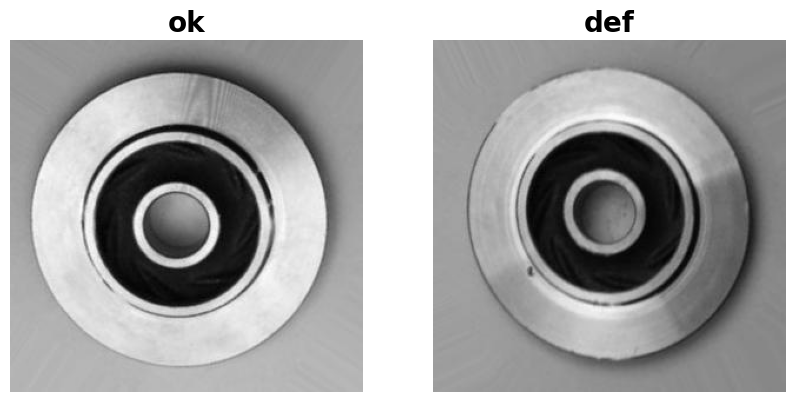

In [9]:
import matplotlib.pyplot as plt

Ok_img = "/content/data/casting_data/casting_data/train/ok_front/cast_ok_0_1.jpeg"
def_img = "/content/data/casting_data/casting_data/train/def_front/cast_def_0_0.jpeg"

plt.figure(figsize=(10,8))
ok = plt.imread(Ok_img)
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("ok", weight='bold', size=20)
plt.imshow(ok,cmap='gray')

ng = plt.imread(def_img)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("def", weight='bold', size=20)
plt.imshow(ng,cmap='gray')

plt.show()

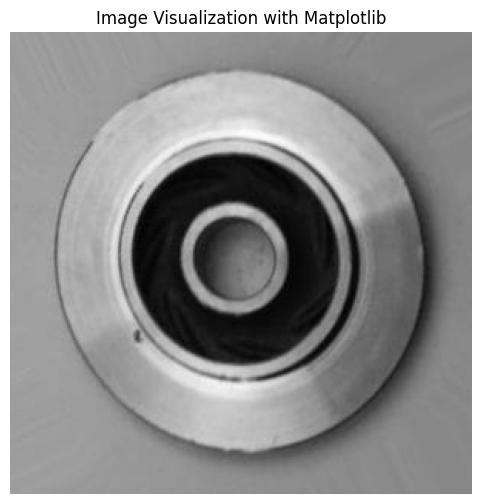

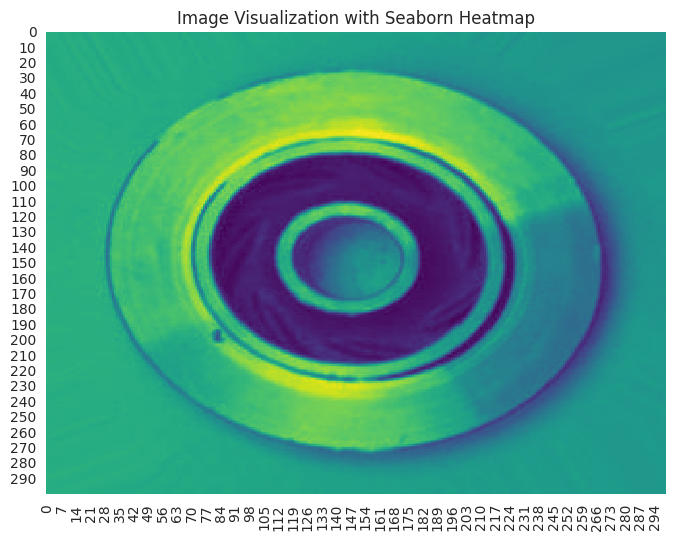

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np

# Load an image using OpenCV
image_path = "/content/data/casting_data/casting_data/train/def_front/cast_def_0_0.jpeg"  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB

# Matplotlib visualization
def show_with_matplotlib(image):
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")  # Hide axes
    plt.title("Image Visualization with Matplotlib")
    plt.show()

# Seaborn visualization
def show_with_seaborn(image):
    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 6))
    sns.heatmap(np.mean(image, axis=2), cmap="viridis", cbar=False)
    plt.title("Image Visualization with Seaborn Heatmap")
    plt.show()

# Show image with different methods
show_with_matplotlib(image)
show_with_seaborn(image)


*# Data Augmentation*

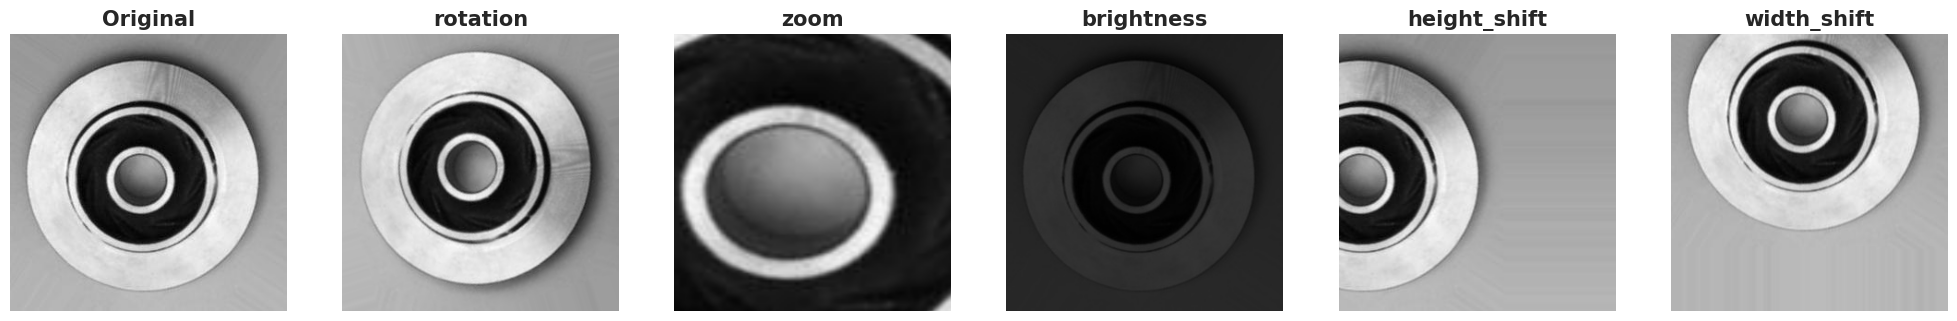

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
img = cv2.imread(Ok_img)
img_4d = img[np.newaxis]
plt.figure(figsize=(25,10))
generators = {"rotation":ImageDataGenerator(rotation_range=180),
              "zoom":ImageDataGenerator(zoom_range=0.7),
              "brightness":ImageDataGenerator(brightness_range=[0.2,1.0]),
              "height_shift":ImageDataGenerator(height_shift_range=0.7),
              "width_shift":ImageDataGenerator(width_shift_range=0.7)}

plt.subplot(1, 6, 1)
plt.title("Original", weight='bold', size=15)
plt.imshow(img)
plt.axis('off')
cnt = 2
for param, generator in generators.items():
    image_gen = generator
    gen = image_gen.flow(img_4d, batch_size=1)
    batches = next(gen)
    g_img = batches[0].astype(np.uint8)
    plt.subplot(1, 6, cnt)
    plt.title(param, weight='bold', size=15)
    plt.imshow(g_img)
    plt.axis('off')
    cnt += 1
plt.show()

In [12]:
image_gen = ImageDataGenerator(rescale=1/255,
                               zoom_range=0.1,
                               brightness_range=[0.9,1.0])

In [13]:
train_path = "/content/data/casting_data/casting_data/train"
test_path = "/content/data/casting_data/casting_data/test"

In [119]:
image_shape = (300,300,1) # 300 × 300、graysclaed (full-color : 3)
batch_size = 32
image_gen = ImageDataGenerator(validation_split=0.2)

train_dataset = image_gen.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode="grayscale",# or "rgb"
    classes={'def_front': 0, 'ok_front': 1},
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=0,
    subset="training"
)

val_dataset = image_gen.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode="grayscale",
    classes={'def_front': 0, 'ok_front': 1},
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    seed=0,
    subset="validation"
)

test_dataset = image_gen.flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode="grayscale",
    classes={'def_front': 0, 'ok_front': 1},
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    seed=0)

Found 5307 images belonging to 2 classes.
Found 1326 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [120]:
train_dataset.class_indices

{'def_front': 0, 'ok_front': 1}

# *Callbacks*

In [17]:
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau

In [18]:
class LossCallback(Callback):
  def on_epoch_end(self, epoch, logs):
    print("\n For Epoch Number {} the model has a loss of {} ".format(epoch+1, logs["loss"]))

  def on_batch_end(self, batch, logs):
    print("\n For Batch Number {} the model has a loss of {} ".format(batch+1, logs))

In [19]:
csv_callback = CSVLogger(
    'logs.csv', separator=',', append=True
)

In [20]:
es_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)

In [21]:
def scheduler(epoch, lr):

  if epoch <= 1:
    learning_rate = lr
  else:
    learning_rate = lr * tf.math.exp(-0.1)
    learning_rate = learning_rate.numpy()

  with train_writer.as_default():
    tf.summary.scalar('Learning Rate', data = learning_rate, step = epoch)
  return learning_rate
scheduler_callback = LearningRateScheduler(scheduler, verbose = 1)

In [22]:
checkpoint_callback = ModelCheckpoint(
'weights.{epoch:02d}-{val_loss:.2f}.keras', # Changed the file extension to .keras
monitor='val_precision', verbose=0, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch',
)

In [23]:
plateau_callback = ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=1
)

# *Model*

In [67]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
backend.clear_session()
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(7,7), strides=2, input_shape=(300, 300, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, input_shape=(300, 300, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, input_shape=(300, 300, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(units=224, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 16)        │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 224)                 │       4,645,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,670,817 (17.82 MB)

 Trainable params: 4,670,817 (17.82 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model_save_path = 'casting_product_detection.h5'
early_stop = EarlyStopping(monitor='val_loss',patience=2)
checkpoint = ModelCheckpoint(filepath=model_save_path, verbose=1, save_best_only=True, monitor='val_loss')

## * Train = grayscale Images*

In [77]:
n_epochs = 20
results = model.fit(train_dataset, epochs=n_epochs, validation_data=val_dataset, callbacks=[early_stop,checkpoint])

Epoch 1/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6285 - loss: 24.8396
Epoch 1: val_loss improved from inf to 0.24508, saving model to casting_product_detection.h5


166/166 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.6292 - loss: 24.7267 - val_accuracy: 0.9178 - val_loss: 0.2451
Epoch 2/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9211 - loss: 0.2136
Epoch 2: val_loss improved from 0.24508 to 0.12115, saving model to casting_product_detection.h5


166/166 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.9211 - loss: 0.2134 - val_accuracy: 0.9646 - val_loss: 0.1212
Epoch 3/20
165/166 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9713 - loss: 0.0935
Epoch 3: val_loss improved from 0.12115 to 0.06444, saving model to casting_product_detection.h5


166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9714 - loss: 0.0933 - val_accuracy: 0.9781 - val_loss: 0.0644
Epoch 4/20
165/166 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9835 - loss: 0.0506
Epoch 4: val_loss improved from 0.06444 to 0.05817, saving model to casting_product_detection.h5


166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.9835 - loss: 0.0507 - val_accuracy: 0.9819 - val_loss: 0.0582
Epoch 5/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9614 - loss: 0.0972
Epoch 5: val_loss did not improve from 0.05817
166/166 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9615 - loss: 0.0971 - val_accuracy: 0.9819 - val_loss: 0.0606
Epoch 6/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9896 - loss: 0.0335
Epoch 6: val_loss improved from 0.05817 to 0.04467, saving model to casting_product_detection.h5


166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.9897 - loss: 0.0335 - val_accuracy: 0.9819 - val_loss: 0.0447
Epoch 7/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9890 - loss: 0.0331
Epoch 7: val_loss improved from 0.04467 to 0.03904, saving model to casting_product_detection.h5


166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9890 - loss: 0.0331 - val_accuracy: 0.9842 - val_loss: 0.0390
Epoch 8/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9951 - loss: 0.0158
Epoch 8: val_loss improved from 0.03904 to 0.03801, saving model to casting_product_detection.h5


166/166 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.9951 - loss: 0.0158 - val_accuracy: 0.9910 - val_loss: 0.0380
Epoch 9/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9879 - loss: 0.0342
Epoch 9: val_loss did not improve from 0.03801
166/166 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.9879 - loss: 0.0342 - val_accuracy: 0.9872 - val_loss: 0.0468
Epoch 10/20
165/166 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9918 - loss: 0.0239
Epoch 10: val_loss did not improve from 0.03801
166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9918 - loss: 0.0240 - val_accuracy: 0.9834 - val_loss: 0.0509


## * Train = rgb Images*

In [99]:
n_epochs = 20
results = model.fit(train_dataset, epochs=n_epochs, validation_data=val_dataset, callbacks=[early_stop,checkpoint])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6101 - loss: 29.5910
Epoch 1: val_loss did not improve from 0.03801
166/166 ━━━━━━━━━━━━━━━━━━━━ 28s 143ms/step - accuracy: 0.6106 - loss: 29.4565 - val_accuracy: 0.7903 - val_loss: 0.4479
Epoch 2/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7939 - loss: 0.4256
Epoch 2: val_loss did not improve from 0.03801
166/166 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.7940 - loss: 0.4255 - val_accuracy: 0.8710 - val_loss: 0.3166
Epoch 3/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8670 - loss: 0.3098
Epoch 3: val_loss did not improve from 0.03801
166/166 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.8670 - loss: 0.3097 - val_accuracy: 0.8891 - val_loss: 0.2431
Epoch 4/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9074 - loss: 0.2253
Epoch 4: val_loss did not improve from 0.03801
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9073 - loss: 0.2254 - val_accuracy: 0.8831 - val_loss:

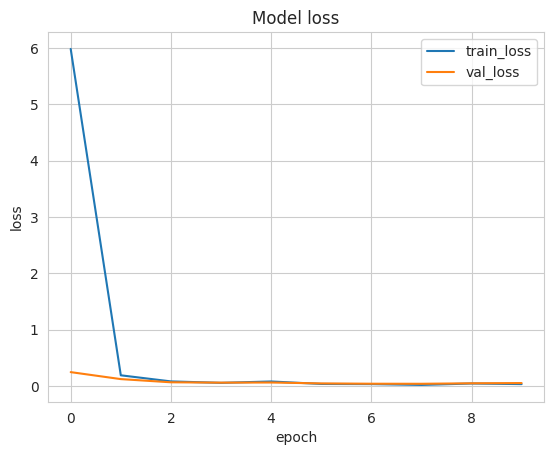

In [78]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

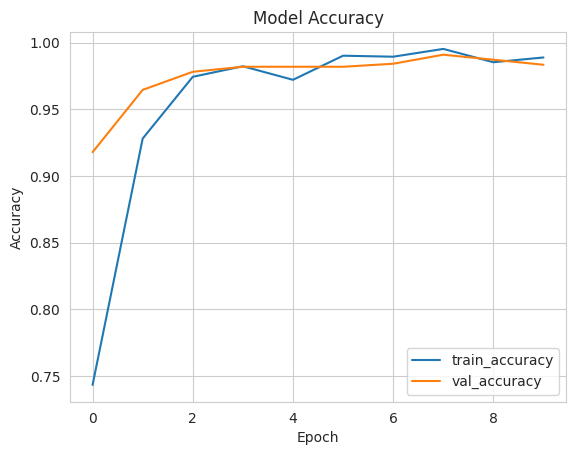

In [79]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [81]:
model_history = { i:list(map(lambda x: float(x), j)) for i,j in results.history.items() }
with open('model_history.json', 'w') as f:
    json.dump(model_history, f, indent=4)

In [82]:
import pandas as pd

In [83]:
losses = pd.DataFrame(model_history)
losses.index = map(lambda x : x+1, losses.index)
losses.head(3)

,accuracy,loss,val_accuracy,val_loss
1,0.743169,5.986481,0.917798,0.245080
2,0.928020,0.188641,0.964555,0.121150
3,0.974373,0.080378,0.978130,0.064437


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
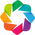

In [90]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

In [91]:
g = hv.Curve(losses.loss, label='Training Loss') * hv.Curve(losses.val_loss, label='Validation Loss') \
    * hv.Curve(losses.accuracy, label='Training Accuracy') * hv.Curve(losses.val_accuracy, label='Validation Accuracy')
g.opts(opts.Curve(xlabel="Epochs", ylabel="Loss / Accuracy", width=700, height=400,tools=['hover'],show_grid=True,title='Model Evaluation')).opts(legend_position='bottom')

:Overlay
   .Curve.Training_Loss       :Curve   [index]   (loss)
   .Curve.Validation_Loss     :Curve   [index]   (val_loss)
   .Curve.Training_Accuracy   :Curve   [index]   (accuracy)
   .Curve.Validation_Accuracy :Curve   [index]   (val_accuracy)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


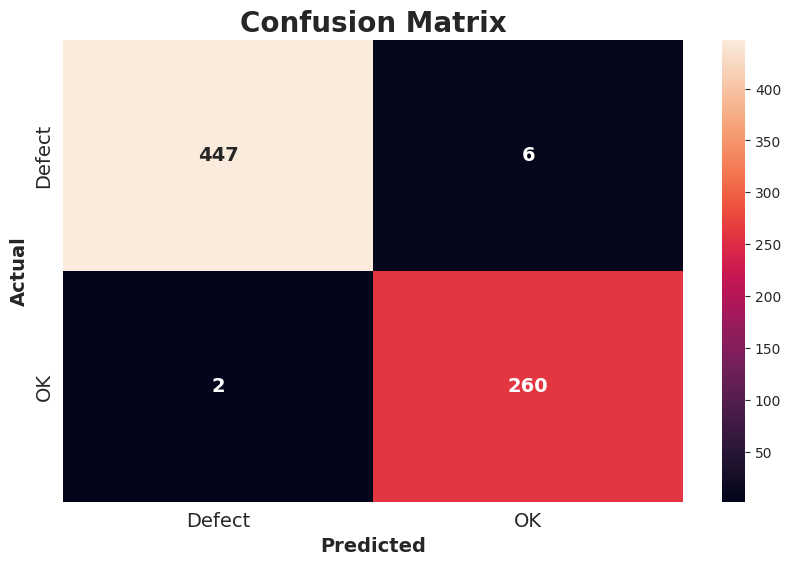

In [94]:
pred_probability = model.predict(test_set)
predictions = pred_probability > 0.5

plt.figure(figsize=(10,6))
plt.title("Confusion Matrix", size=20, weight='bold')
sns.heatmap(
    confusion_matrix(test_dataset.classes, predictions),
    annot=True,
    annot_kws={'size':14, 'weight':'bold'},
    fmt='d',
    xticklabels=['Defect', 'OK'],
    yticklabels=['Defect', 'OK'])
plt.tick_params(axis='both', labelsize=14)
plt.ylabel('Actual', size=14, weight='bold')
plt.xlabel('Predicted', size=14, weight='bold')
plt.show()

In [96]:
print(classification_report(test_dataset.classes, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.996     0.987     0.991       453
           1      0.977     0.992     0.985       262

    accuracy                          0.989       715
   macro avg      0.986     0.990     0.988       715
weighted avg      0.989     0.989     0.989       715

